## Final Project Debrief

Text mining and digitalized text data allows the emergence of natural language processing these days. People desperately hope to teach machine to master this art of human being and have already started to build technology based on machine learning outcomes based on text data. However, human language itself itself carries many biases (e.x. gender, race, age etc.) and without interventions, machine learning prediction will carry out the same bias in its outcome. For example, a recent research demonstrates that the Word2Vec model trained on 3 billions words from GoogleNews written by professiona journalist contain gender bias (e.g. computer science is close to man while nurisng is close to women) and proposed solutions to debias it (Bolukbasi, Chang, Zou, Saligrama & Kalai, 2016). Biases in such case will impact far more than just "paper work". For example, female computer scientists' profile might be ranked lower on the searching engine, which means when people search for computer scientists, they are less likely to show up, just because text mining algorithm says the phrase "computer scientists" are closer to men rather than women. 

My final project tries to tap into this space by learning how to train the most popular word-vectorization model called Word2Vec and explore whether parenting books have different "genderred" language associated with "mom" and "dad". I will 
- 1) Explain Word2Vec algorithm and how it works 
- 2) Train Word2Vec model on the text dataset of six parenting books
- 3) Experiment with model's basic functionalities (e.x. word similarity score) 
- 4) Experiment with different parametrizations
- 5) Output words along gender (dad-mom) axis and exam whether the text data has gender bias. 

## Word2Vec Debrief

### What is Word2Vec
Word2Vec is an algorithm that contain a group of related models to converts words into vector representation (which is also called word embeddings). These models are shallow two-layers neural networks that are trained to reconstruct linguistic contexts of words. Basically, Word2Vec takes in a text corpus, in the form of sentences while each word is an independent string (see codes for example), and output a vector space in which each word is presented as a high dimensional vector. Noted that Word2Vec can also apply to phrases. 

### What tasks is it capable of
Some basic tasks a trined Word2Vec model can do since vector representations allow us to calculate similarities between words: 
- 1) compute similarity score between any two words that exist in the vocabulary of the trained model 
- 2) replicate human analogy by adding and subtracting vectors. 
   - *For example*, vector('king') - vector('man') + vector('woman') is close to vector('queen'). 
- 3) tease out words that don't belong to a group of words (as in it has the furtherest distance to all other words)
   - *For example*, >>> model.wv.doesnt_match("breakfast cereal dinner lunch".split()) >>> "cereal"
- 4) calculate the probability of a text under the trained model 
   - *For example*, >>> model.score(["The fox jumped over a lazy dog".split()]) >>> 0.21 
- 5) with all these above, we can infer the meaning the words and those meanings along certain standards/axis! 
   - *For example*, examing what words are used more often to describe female professors, compared with male professors, by positioning words along gender axis (Schmidt, 2015)
- 6) Though Word2Vec is contains only simple neural network, but it can feed the output to a more complicated model to make prediction or classification. 
   - *For example*, "given a movie review (raw text), classify that movie review as either positive or negative based on the words it contains. This is done by combining Word2Vec vectors and a recurrent neural network model. Each word in a review is vectorized (using the Word2Vec model) and fed into a recurrent neural network" ("Word2VecSentimentRNN.java", n.d.).
   
###  How is it trained
Confusing as it sounds, there is an already trained Word2Vec model by Google who first developed this algorithm that can be retrieved through Gensim. This model is trained on 3 billion words scraped from GoogleNews and can be used to exam other datasets. In my final proejct I trained a model myself on a different text dataset. 

The goal of the training is output similar vectors for words that are close in the context. The two models Word2Vec uses are just two different ways to achieve the same goal (predict similarities). They are skip-gram and CBOW (Continuous Bag of Words), which are mirror to each other. Skip-gram model predicts the probability of a target words given the context words, while CBOW predicts the probability of context words given the target word. 

**For Skip-gram model**, The training sample skip-gram takes in is paired text, all enumerations of target word and its neighbors (number of neighbors depends on window size). The training process is to learn the weights of the hidden layer (there is only one hidden layer), which is essentially learning the vectorized representation of the word. The output quantifies the probabilities of each word being the neighbor of the target word we chose (see graphs below). 

<img src="skip-gram-sample.png", style="width: 400px;"/>

<img src="skip_gram_net_arch.png", style="width: 500px;"/>

Let's break it down a bit based on the info graph above. Assume we have **n** words and each will be transformed into **m** dimensional vectors, the input is represented as a big vector with 1**n** dimensions. Each word corresponding to flipping one slot to 1 while others were 0s. The hidden layer is a weight matrix with **n** rows (one word as one neuron) and **m** columns (dimensions for each neuron). The output layer is a softmax regression classifier. 

However, when we have millions of words, the weight matrix can be come very big and very slow to learn. Training a neural network means tweaking all neurons based on cost function to better predict a sample, but it also means every neuron will be adjusted a little bit. **Negative sampling** is a technique that allow only a few neurons (randomly selected that output 0) to be adjusted (rather than all of them). **Hierarchical softmax** is another technique that seeks to maximize the conditional log-likelihood. 

Skip-gram model is slower than CBOW, but better at tackling semantics with large dataset. In my project, the dataset is not very big, so speed will not be an issue. So I chose Skip-gram model with negative sampling.

Skip-gram model's **Objective Function** is:

$$\frac{1}{T}\displaystyle\sum_{t=1}^{T} \displaystyle\sum_{-c\leq j \leq c, j \neq 0}logp(w_{t+j}|w_t)$$

*T*: number of training samples 

*c*: context word window size 

*p*: probability of softmax function 

$w_t$: target word 

which is saying, take the average of all words' sum log-likelihood in window size, in which the log-likelihood is the **softmax function** : 

$$p(w_{t+j}|w_t) = \frac{exp{(\nu^{\prime}_{w0}}^T\nu_{w1})}{\sum_{w=1}^{W}exp({\nu^{\prime}_{w0}}^T\nu_{w1})}$$

$\nu_{w1}$: input word vector 

$\nu^{\prime}_{w0}$: output word vector

$W$: number of words in the vocabulary

**softmax function** takes the dot product, again quantify the similarities among words (those that are close will have larger dot product) and normalize over all words. This dot product is equated to cosine similarity because it's normalized. The normalization part is the inefficient part with large dataset. Then people will use optimization method **gradient descent** to find the weights in weight matrix. 

### How to Evaluate Word2Vec?
Word2Vec training is an unsupervised task and thus have no standard ways of evaluation. The quality of the model depends on the task. Google, however, released a test set that can be used. The outcome is sensitive to parametrization. 

## Codes

### Import Data
To check gender bias, I can either chose a huge dataset and exam the gender bias in human language, or I can choose a particular context where gender bias is more present in the language. I decided on the latter. So my dataset is six random books chosen online and merged together. I want to exam whether parenting book has gender-baised language associated with "mom" or "dad". I am aware that the dataset might be too small for Word2Vec model to capture the actual effects, but I already tried finding all the available free books online to download.  

In [413]:
with open('Dad_Knows.txt', 'r') as book:
    dad = book.read()

with open('Mom_Knows.txt', 'r') as book:
    mom = book.read()

with open('Practical-Parenting.txt', 'r') as book:
    PP = book.read()
    
with open('The-Intentional-Parent-Becoming-a-Competent-Family-Leader.txt', 'r') as book:
    IPB = book.read()
    
with open('Power-of-Parenting-a-Handbook-for-New-Parent-and-a-Guide-to-All-Parents.txt', 'r') as book:
    PPH = book.read()
    
with open('Science of Parenting.txt', 'r') as book:
    SP = book.read()

text = dad + mom + PP + IPB + PPH + SP
len(text)

1169737

### Text Preprocessing 
Text pre-processing included the following: 
- removing \r\n
- remove whitespace
- remove punctuations
- split sentences into words 
- stem word 
   - this is a native stem and thus might destroy some words that don't follow the traditional form.
- remove stopwords 
   - some sources say it's better to keep common words to word2vec to account for semantic associations, but I tried and the top outputs are very likely to be common words. 
- remove digits 
- remove all non-ASCII characters. 
   - If not removed for example, "let's" will be processed appropriately. 

In [475]:
import warnings
warnings.filterwarnings('ignore')

processed = []

#Establish stopwords
sw = set(stopwords.words('english'))

sw = list(sw) + ['this','that','first','always','would','everything','anything','every','whose',
                 'what','why','how']

#stem the words. It might over stem some workds such as motive->mot; moment->mo  
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

for x in text.split("."):
    #remove \r\n\
    x = x.replace('\n', ' ')
    #remove whitespace 
    x = x.strip()
    #remove punctuation
    x = x.translate(None,string.punctuation).lower()
    #split sentences into words 
    x = x.split()
    #stem word 
    x = [stem(word) for word in x]
    #remove stopwords
    x = [word for word in x if word not in sw]
    #remove digits 
    for word in x:
        if word.isdigit():
            x.remove(word)
    #remove all non-ASCII characters. Otherwise, let's will translate into let\xe2\x80\x99.
    x = [word.decode('utf8').encode('ascii', errors='ignore') for word in x]
    #empty string will not pass boolean. Exam if x is an empty string 
    if x: 
        processed.append(x)
    
processed[21]

['dad',
 'know',
 'addition',
 'god',
 'desir',
 'walk',
 'sincere',
 'yet',
 'goal',
 'orient',
 'path',
 'dad',
 'try',
 'make',
 'take']

### Training a Word2Vec Model

I tried to parametrize the model differently. However, I don't see huge correlation between tweaking variables and more sensible outcomes. But I do observe that min_count has a huge effect of sample size (word vocabulary size). I set it to 5 because I want to capture the main behaviors occur across all 6 books. The effect of changing each parameters are below. I ended up choosing skip-gram model with negative sampling as the main model structure because it's said to have better semantic outputs. Size is set to 300 to improve accuracy. 

In [574]:
from gensim.models import Word2Vec

#hyperparameters
#https://radimrehurek.com/gensim/models/word2vec.html

#decide the threshold frequency of the words to be counted in the training. Here words appear at least five times will be counted. 
min_count = 5

#size determins the dimensions of word vectors, controlling degree of freedom. 
#The larger it is, the slower it will be, but more accurate in outcome. Word2Vec on GoogleNews uses 300.  
size = 300

#window size of context words
window = 5

#sg = 1: skip-gram model. sg=0, CBOW
sg = 1

#negative: negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). Default is 5.
negative = 5

model = Word2Vec(processed, min_count=min_count, size=size, window=window, sg=sg, negative=5)

#### Experimenting basic functionalities of Word2Vec model
Noted that 'dad' and 'mom' have very high similarities together, maybe because these are parenting books so of course they are going to mention 'mom' and 'dad' together very often and they are also high frequency words.

In [575]:
print "This is the vector representation for word 'dad'"
print model.wv['dad'].shape
print "------------------------"
print "This is the vector similarity between word 'dad' and 'mom'"
print model.wv.similarity('dad', 'mom')

This is the vector representation for word 'dad'
(300,)
------------------------
This is the vector similarity between word 'dad' and 'mom'
0.982678619742


#### 2D PCA to show some word clusters 
Noted that after processing, I only have about 2567 unique words, filtering out words that appear less than 5 times. That is not a big dataset and potentially the reasons that the outcome is not entirely sensible (I already tried downloading as many parenting books as possible). 

In [576]:
#2567 words and each word vector is 300 dimensions 
model.wv[model.wv.vocab].shape

(2567, 300)

In [577]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit(model.wv[model.wv.vocab]).transform(model.wv[model.wv.vocab])

print('PCA explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

#model.wv.vocab.keys()

PCA explained variance ratio (first two components): [ 0.77188897  0.13663408]


#### Showing the grand distribution of 2D PCA space. 

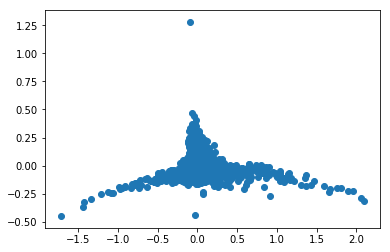

In [578]:
import matplotlib.pyplot as plt

#label = list(model.wv.vocab.keys())

x = data_pca[:,0]
y = data_pca[:,1]

plt.scatter(x,y)

#for i, txt in enumerate(label):
#    plt.annotate(txt, (x[i],y[i]))
    
plt.show()

#### showing PCA space of the first 50 words with labels on. 
We can see that words like *immature*, *hormone* and *affect* are together, which makes sense semantically, but it's very hard to tell whether other clusters make sense semantically. This is more of a demo than a sensible outcome. 

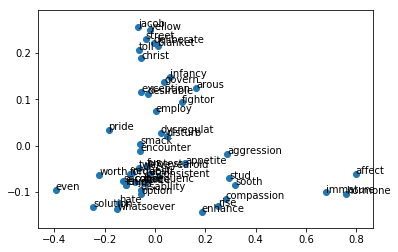

In [579]:
label = list(model.wv.vocab.keys())[1:50]

x = data_pca[:,0][1:50]
y = data_pca[:,1][1:50]

plt.scatter(x,y)

for i, txt in enumerate(label):
    plt.annotate(txt, (x[i],y[i]))
    
plt.show()

**Output the most similar words against 'dad'**

starting from the 20th word to skip the too common verbs show up as the top.

In [580]:
model.wv.similar_by_word('dad',100)[20:40]

[('achieve', 0.8943347930908203),
 ('ensure', 0.893364667892456),
 ('come', 0.892510175704956),
 ('right', 0.89128577709198),
 ('special', 0.8905321359634399),
 ('trust', 0.890475869178772),
 ('go', 0.8894730806350708),
 ('word', 0.8818568587303162),
 ('around', 0.8786227703094482),
 ('dont', 0.8771792650222778),
 ('mother', 0.8766565918922424),
 ('could', 0.8760354518890381),
 ('must', 0.8751671314239502),
 ('everyth', 0.8744456171989441),
 ('listen', 0.8733644485473633),
 ('put', 0.8712601661682129),
 ('look', 0.8681964874267578),
 ('ask', 0.8670388460159302),
 ('someone', 0.8665679693222046),
 ('let', 0.86632239818573)]

**Output the most similar words against 'mom'**

In [581]:
model.wv.similar_by_word('mom',100)[20:40]

[('daughter', 0.8502620458602905),
 ('made', 0.8486624956130981),
 ('right', 0.8480209112167358),
 ('ensure', 0.8478241562843323),
 ('come', 0.8465695977210999),
 ('go', 0.8459122180938721),
 ('l', 0.845537006855011),
 ('special', 0.8446719646453857),
 ('word', 0.8329364061355591),
 ('must', 0.8328597545623779),
 ('listen', 0.831290066242218),
 ('let', 0.8308287858963013),
 ('ask', 0.8305448293685913),
 ('everyth', 0.8274784088134766),
 ('could', 0.8250272274017334),
 ('thing', 0.8232235908508301),
 ('around', 0.8199032545089722),
 ('put', 0.819516658782959),
 ('sure', 0.8194472193717957),
 ('someone', 0.8169301748275757)]

From this outcome we can see that, all parenting books ask both 'dad' and 'mom' to listen! 

### Transform the space along gender axis
Noted that some words were cut off in the stemming process (e.x. loves -> lov), but it doesn't impact how they were ranked. Most similar words (above) to 'mom' and 'dad' don't seem to be have much differences. It's also because 'mom' and 'dad' are very close to each other on distance. So I want to use a different way to measure relative closeness of words to 'mom' and 'dad', by transforming the space to distribute along a "mom-dad" axis. To do that, I calculated the differences between cosine similarities between each vector and 'mom' or 'dad' vector (see equation below). If *d* is smaller than zero, it means it's closer to 'mom' because the word has closer distance to 'mom' than 'dad', vice versa. This is different from the similarity metric built into Word2Vec (which is what I demo above). Since 'mom' and 'dad' are very close to each other, words most similar to 'mom' and 'dad' can be positioned between both. My transformation basically emphasizes words that are close to 'mom' but not close to 'dad' (or vice versa) as the similarity metric.  

**Great!** After transformation, now we can words that are more "genderred" showing up more clearly. Interestingly, being a "dad" seems to be a chemically filled experience. Words that are cloesest to 'dad' include 'anxiety', 'alcohol', 'distress', 'cortisol', 'hormone' and 'serotonin' etc, while words associated with 'mom' are much more neutral. It might imply that being a "dad" is a much more emotionally intense task than being a 'mom'. Besides that, I wouldn't say the books' language show significant difference in mom's endeavors compared with dad's. 

I tried to see if I can replicate the word cluster along gender axis in the paper, but I am not able to capture how they calculate the y-axis (what I did above is how they calculated x-axis)

In [582]:
from scipy import spatial
import heapq
import operator

mom_v = model.wv['mom']
dad_v = model.wv['dad']

d = [spatial.distance.cosine(mom_v, v) - spatial.distance.cosine(dad_v,v) 
 for v in model.wv[model.wv.vocab]]

#for large lists, use heapq is faster for sorting. 
dad50 = zip(heapq.nlargest(50, enumerate(d), key=operator.itemgetter(1)))
mom50 = zip(heapq.nsmallest(50, enumerate(d), key=operator.itemgetter(1)))

In [586]:
#print top 40 words that are closest to 'dad'
for i in range(40):
    print model.wv.vocab.keys()[dad50[i][0][0]]

year
baby
research
ear
physical
later
dur
anxiety
alcohol
depression
cry
infant
human
low
contact
separation
affect
distres
three
hormone
mammal
cell
serotonin
high
stat
longterm
cortisol
emotion
function
intense
impuls
childhood
releas
establish
link
show
blood
vital
social
pain


In [585]:
#print top 40 words that are closest to 'mom'.
for i in range(40):
    print model.wv.vocab.keys()[mom50[i][0][0]]

mom
best
want
tribecakidcoach
know
dream
dad
dont
say
great
someth
i
alway
god
g
tell
let
ask
trust
get
think
teacher
kid
try
thing
listen
must
achieve
right
go
talk
teach
remember
way
ensure
sure
special
come
might
everyth


### Evaluation
The standard evaluation metric for Word2Vec is the sample test set provided by Google. I downloaded the test set and compared it with my model, and it doesn't run very well. It maybe because the test sets mostly contain samples such as capital-common-countries, currency, city-in-state etc that are not very commonly mentioned in parenting books. Nonetheless, for unsupervised tasks like this, having sensible outcome is more valuable as a metric than this standard test.

In [590]:
#https://rare-technologies.com/word2vec-tutorial/
model.accuracy('questions-words.txt',restrict_vocab=100)

[{'correct': [], 'incorrect': [], 'section': u'capital-common-countries'},
 {'correct': [], 'incorrect': [], 'section': u'capital-world'},
 {'correct': [], 'incorrect': [], 'section': u'currency'},
 {'correct': [], 'incorrect': [], 'section': u'city-in-state'},
 {'correct': [], 'incorrect': [], 'section': u'family'},
 {'correct': [], 'incorrect': [], 'section': u'gram1-adjective-to-adverb'},
 {'correct': [], 'incorrect': [], 'section': u'gram2-opposite'},
 {'correct': [], 'incorrect': [], 'section': u'gram3-comparative'},
 {'correct': [], 'incorrect': [], 'section': u'gram4-superlative'},
 {'correct': [], 'incorrect': [], 'section': u'gram5-present-participle'},
 {'correct': [], 'incorrect': [], 'section': u'gram6-nationality-adjective'},
 {'correct': [], 'incorrect': [], 'section': u'gram7-past-tense'},
 {'correct': [], 'incorrect': [], 'section': u'gram8-plural'},
 {'correct': [], 'incorrect': [], 'section': u'gram9-plural-verbs'},
 {'correct': [], 'incorrect': [], 'section': 'total'

## Reference 

Wikipedia Dataset: https://pypi.python.org/pypi/wikipedia (didn't use)

Explanation of Word2Vec from Google (how to measure it): https://code.google.com/archive/p/word2vec/

Manual of Word2Vec: https://radimrehurek.com/gensim/models/word2vec.html

The Skip-gram Model: http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

Cool visualization: https://github.com/dominiek/word2vec-explorer (but not adapatable to this project)

Schmidt, B. (2015). Rejecting the gender binary: a vector-space operation. Bookworm.benschmidt.org. Retrieved 13 December 2017, from http://bookworm.benschmidt.org/posts/2015-10-30-rejecting-the-gender-binary.html

Import Wiki corpus: https://github.com/hgrif/wiki-word2vec (didn't use)

Bolukbasi, T., Chang, K., Zou, J., Saligrama, V., & Kalai, A. (2016). Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings. Arxiv. Retrieved from https://arxiv.org/pdf/1607.06520.pdf

Laymen language to explain how to debias the algorithm (corresponding to the paper): https://www.technologyreview.com/s/602025/how-vector-space-mathematics-reveals-the-hidden-sexism-in-language/

A Comprehensive explanation of Word2Vec: https://en.wikipedia.org/wiki/Word2vec

Word2VecSentimentRNN.java. GitHub. Retrieved from https://github.com/deeplearning4j/dl4j-examples/blob/master/dl4j-examples/src/main/java/org/deeplearning4j/examples/recurrent/word2vecsentiment/Word2VecSentimentRNN.java

Chablani, M. (2017). Word2Vec (skip-gram model): PART 1 - Intuition. Towards Data Science. Retrieved 13 December 2017, from https://towardsdatascience.com/word2vec-skip-gram-model-part-1-intuition-78614e4d6e0b

Text processing: http://www.nltk.org/book/ch03.html

Parametrization: https://radimrehurek.com/gensim/models/word2vec.html